**Loan Default Prediction**

This project uses supervised machine learning to predict whether a customer is likely to default on a loan, based on their application and credit history.

**Goals:**
- Perform EDA on the loan dataset
- Engineer features for predictive modeling
- Train and evaluate multiple models
- Use model explainability techniques (optional)
- Save and use the best model for future predictions


**Import Libraries and Local Modules**

In [3727]:
#Core
import pandas as pd
import numpy as np

#Visuals
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set(style='darkgrid')
plt.ion()  # For interactive mode in .py scripts (optionaln here for Jupyter notebook)



#ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report



#utility/setup

import warnings
warnings.filterwarnings('ignore')
import sys
import os
sys.path.append(os.path.abspath("../src"))




#custom code
import importlib
from preprocessing import clean_data
from feature_engineering import create_features
from model import train_model, evaluate_model
from visualization import plot_confusion
import preprocessing
importlib.reload(preprocessing)
import visualization
importlib.reload(visualization)
import feature_engineering as fe
from feature_engineering import create_features
import joblib
import model
importlib.reload(model)
from model import train_model, evaluate_model, compare_models
from feature_engineering import label_encoders, onehot_encoder, scaler, pca
importlib.reload(fe)
import shap

**Load your Data**

In [3729]:
df_train=pd.read_csv(r'C:\Users\ABIMIC\Documents\Study\AI\Projects\Practical\Supervised Machine Learning\Loan Default Prediction_New\data\raw\train.csv')

In [3730]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3731]:
df_test=pd.read_csv(r'C:\Users\ABIMIC\Documents\Study\AI\Projects\Practical\Supervised Machine Learning\Loan Default Prediction_New\data\raw\test.csv')

**Back up Loaded Data**

In [3733]:
df_train_bk = df_train
df_test_bk = df_test

**Exploratory Data Analysis**

In [3735]:
#concise stats of the train data
print('Concise stats of the train data')
df_train.info()

print('\n')
print('---------------------')
print('\n')


print('concise stats of the train data')
df_test.info()

Concise stats of the train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


---------------------


concise stats of the train data
<class 'pandas.core.fr

In [3736]:
#Summary statistics of the train data
print('summary stats of the train data')
display(df_train.describe())

print('\n ------------------------- \n')

print('summary stats of the test data')
df_test.describe()

summary stats of the train data


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000



 ------------------------- 

summary stats of the test data


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [3737]:
#shape of the data
print('Shape of train data')
display(df_train.shape)


print('\n----------------------- \n') 

print('Shape of test data')
df_test.shape

Shape of train data


(614, 13)


----------------------- 

Shape of test data


(367, 12)

**Handling Missing Values**

In [3739]:
#missing values analysis of train data
print('\n Train Data Missing columns in descending order')
print(df_train.isnull().sum().sort_values(ascending=False))

#missing values analysis of test data
print('\n Test data Missing columns in descending order')
print(df_test.isnull().sum().sort_values(ascending=False))


 Train Data Missing columns in descending order
Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

 Test data Missing columns in descending order
Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64


**Now let us know those categorical and Numerical Columns of the missing columns**

- Missing Categorical Columns = Credit History, Self Employed, Gender, Dependents, Loan Amount Term

- Missing Numerical Columns = LoanAmount

In [3741]:
#Data Types for Numerical Missing Columns

print('Credit History Records')
display(df_train['Credit_History'].value_counts())


print('\n ********************** \n')

print('Self Employed Records')
display(df_train['Self_Employed'].value_counts())


print('\n ********************** \n')


print('Gender Records')
display(df_train['Gender'].value_counts())




print('\n ********************** \n')


print('Dependents Records')
display(df_train['Dependents'].value_counts())


print('\n ********************** \n')


print('Loan_Amount_Term Records')
display(df_train['Loan_Amount_Term'].value_counts())

Credit History Records


Credit_History
1.0    475
0.0     89
Name: count, dtype: int64


 ********************** 

Self Employed Records


Self_Employed
No     500
Yes     82
Name: count, dtype: int64


 ********************** 

Gender Records


Gender
Male      489
Female    112
Name: count, dtype: int64


 ********************** 

Dependents Records


Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


 ********************** 

Loan_Amount_Term Records


Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

**Filling the Categorical Columns**

**The Categorical columns would be populated with the Mode**

**Now let us validate the Numerical Column to see how it would be populated, whether using the mean or median**

Right Skewed
- Mean > Median
- In Horizontal or Horizontal Box Plot, The median is closer the left
- Median is used to populate the missing values to avoid distortion from outliers
- In KDE Plot, the tail extends to the right 

Left Skewed
- Median > Mean
- In Horizontal or vertical Box Plot, The median is closer to the right
- Median is used to populate the missing values to avoid distortion from outliers
- In KDE Plot, the tail extends to the left 

**Analysis of the Numerical Column, LoanAmount, to know whether it is right or left skewed**

In [3745]:
df_train['LoanAmount'].head()

0      NaN
1    128.0
2     66.0
3    120.0
4    141.0
Name: LoanAmount, dtype: float64

<Axes: >

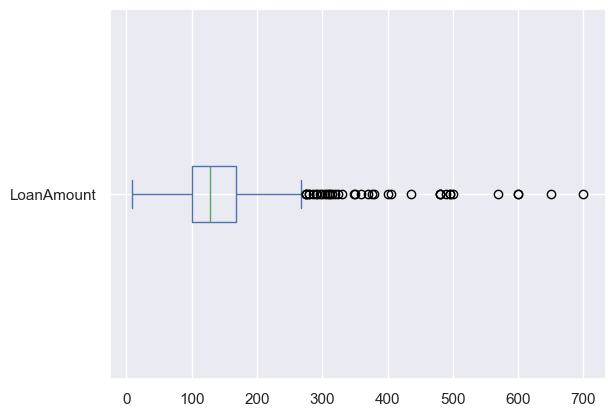

In [3746]:
df_train['LoanAmount'].plot(kind='box', vert=False)

In [3747]:
df_train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

**We can see from above that the mean is greater than the median, hence the distribution in the LoanAmount is rightly skewed**

**Let us Handle Missing Values, Preprocessing**

In [3750]:
df_train = preprocessing.clean_data(df_train)

In [3751]:
#missing values analysis of train data
print('\n Train Data Missing columns in descending order')
print(df_train.isnull().sum().sort_values(ascending=False))


 Train Data Missing columns in descending order
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [3752]:
df_test = preprocessing.clean_data(df_test)

In [3753]:
#missing values analysis of test data
print('\n Test Data Missing columns in descending order')
print(df_test.isnull().sum().sort_values(ascending=False))


 Test Data Missing columns in descending order
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


**Visualization**

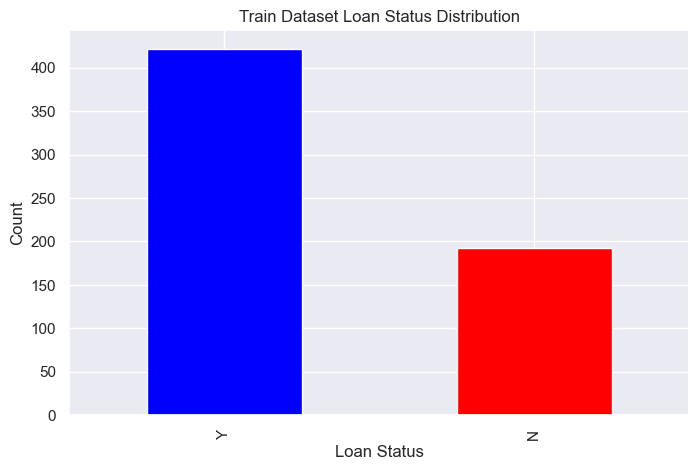

In [3755]:
visualization.plot_loan_status_distribution(df_train)

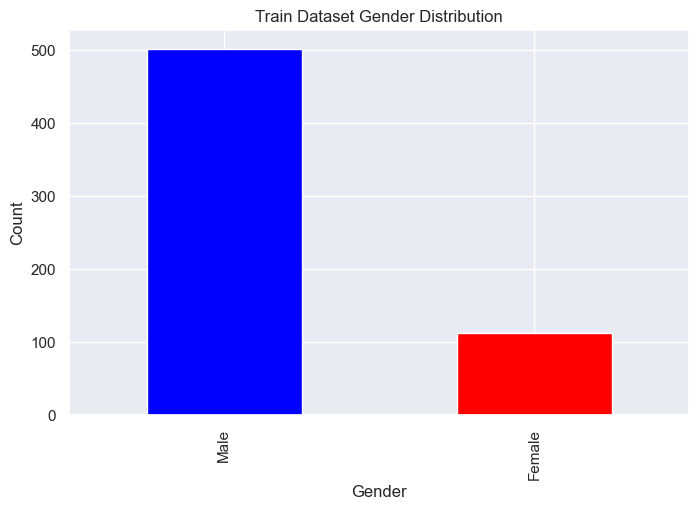

In [3756]:
visualization.plot_gender_distribution(df_train)

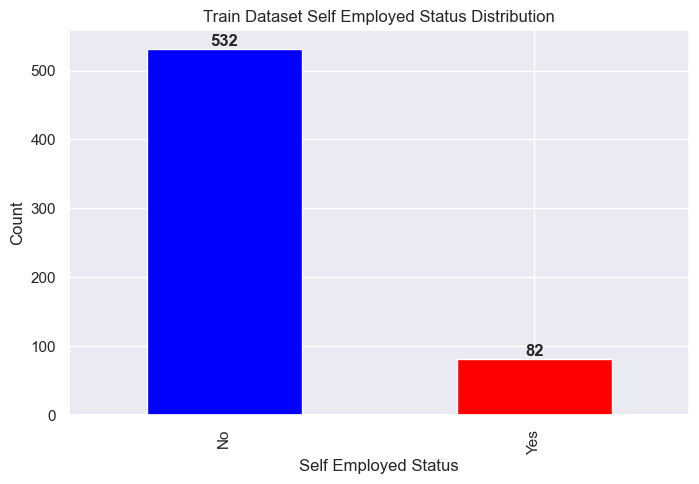

In [3757]:
visualization.plot_self_employed_distribution(df_train)

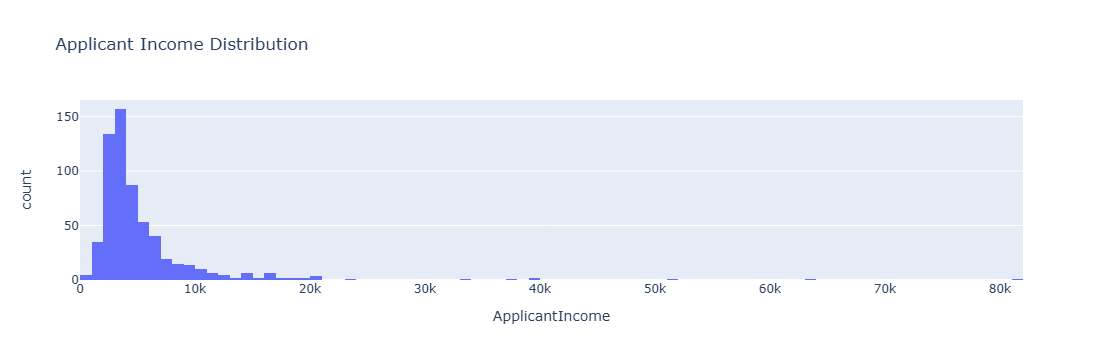

In [3758]:
visualization.plot_applicant_income_distribution(df_train)

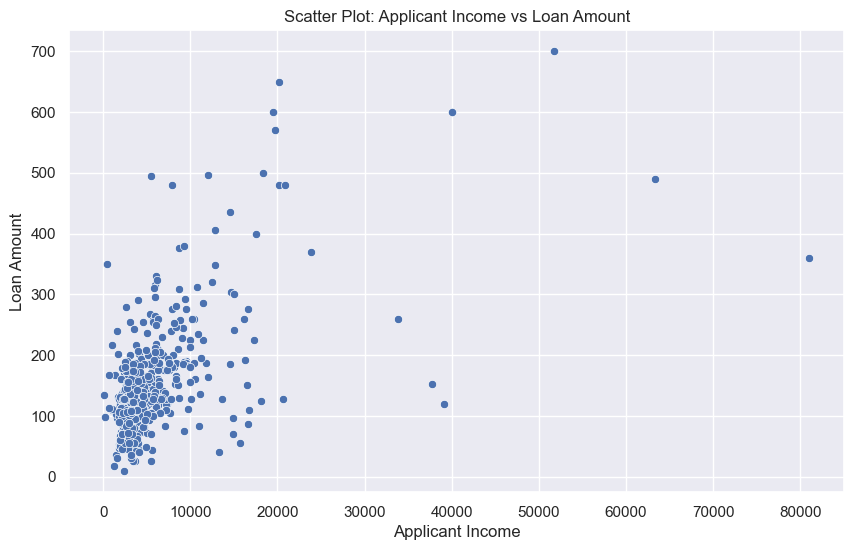

In [3759]:
visualization.plot_scatter_applicant_income_vs_loan_amount(df_train)

**Feature Engineering**

In [3761]:
#preprocess data
#X = fe.preprocess_features(df_train)
X = fe.create_features(df_train, training=True, apply_pca=True)
y = fe.encode_target(df_train)

In [3762]:
# Split and scale
X_train_scaled, X_test_scaled, y_train, y_test, scaler = fe.split_and_scale(X, y)

In [3763]:
# Apply PCA
X_train_pca, X_test_pca, pca = fe.apply_pca(X_train_scaled, X_test_scaled)

In [3764]:
X.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.241772,-0.574632,-0.283241,-0.411422,0.582427
1,-0.154884,-0.023078,-0.369147,-0.227227,-0.590601
2,-0.985217,-0.458547,-0.196962,-0.443698,0.174713
3,-0.592255,0.280457,-0.446254,-0.059348,0.081929
4,-0.114908,-0.567578,-0.301115,-0.400177,0.541944


In [3765]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [3766]:
X.dtypes

PC1    float64
PC2    float64
PC3    float64
PC4    float64
PC5    float64
dtype: object

In [3767]:
y_series = pd.Series(y)
print(y_series.head())

0    1
1    0
2    1
3    1
4    1
dtype: int32


In [3768]:
y_series = pd.Series(y)
print(y_series.dtype)

int32


**Model Evaluation**

In [3770]:
# Train and evaluate multiple models
best_model = compare_models(X_train_pca, X_test_pca, y_train, y_test)
accuracy, y_pred = evaluate_model(best_model, X_test_pca, y_test)


Logistic Regression - Accuracy: 0.8618, AUC-ROC: 0.7755

Decision Tree - Accuracy: 0.7317, AUC-ROC: 0.7040

Random Forest - Accuracy: 0.8374, AUC-ROC: 0.7814

Support Vector Classifier - Accuracy: 0.8455, AUC-ROC: 0.7941

K-Nearest Neighbors - Accuracy: 0.7886, AUC-ROC: 0.7471

Naive Bayes - Accuracy: 0.7724, AUC-ROC: 0.7542

Model Accuracy Ranking:
Logistic Regression: 0.8618
Support Vector Classifier: 0.8455
Random Forest: 0.8374
K-Nearest Neighbors: 0.7886
Naive Bayes: 0.7724
Decision Tree: 0.7317

Best Model: Logistic Regression with Accuracy: 0.8618
AUC-ROC: 0.7755
Accuracy: 0.8617886178861789

Confusion Matrix:
[[22 16]
 [ 1 84]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



In [3771]:
# Save model and preprocessing artifacts
joblib.dump(X, "../model/X_processed.pkl")
joblib.dump(y, "../model/y_encoded.pkl")
joblib.dump(best_model, '../model/best_loan_model.pkl')
joblib.dump(scaler, '../model/scaler/scaler.pkl')
joblib.dump(pca, '../model/pca/pca.pkl')
joblib.dump(label_encoders, "../model/label_encoders.pkl")
joblib.dump(onehot_encoder, "../model/onehot_encoder.pkl")

print("✅ Model and artifacts saved successfully.")

✅ Model and artifacts saved successfully.


In [3772]:
# Save test predictions for analysis
output_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
output_df.to_csv('../outputs/test_predictions.csv', index=False)
print("✅ Test predictions saved to '../outputs/test_predictions.csv'.")

✅ Test predictions saved to '../outputs/test_predictions.csv'.


**To Make Prediction with the loaded test data**

In [3774]:
# ========== PREDICTION PHASE ON UNSEEN TEST DATA ==========

# Load artifacts
model = joblib.load('../model/best_loan_model.pkl')
scaler = joblib.load('../notebooks/scaler/scaler.pkl')
pca = joblib.load('../notebooks/pca/pca.pkl')

In [3844]:
# Save cleaned train data
df_train.to_csv('../data/processed/cleaned_train_data.csv', index=False)

# Save cleaned test data
df_test.to_csv('../data/processed/cleaned_test_data.csv', index=False)


In [3775]:
# Preprocess test data with PCA applied (must match training)
#X_test_new = fe.create_features(df_test, training=False, apply_pca=False)
#X_test_pca_new = pca.transform(X_test_scaled_new)

X_test_pca_new = fe.create_features(df_test, training=False, apply_pca=True)

In [3776]:
# Make predictions
y_test_pred_new = model.predict(X_test_pca_new)

In [3777]:
# Save predictions with Loan_ID
output_df_new = pd.DataFrame({
    'Loan_ID': df_test['Loan_ID'], 
    'Predicted_Loan_Status': y_test_pred_new
})
output_df_new.to_csv('../outputs/df_test_predictions.csv', index=False)
print("✅ Predictions saved to '../outputs/df_test_predictions.csv'")

✅ Predictions saved to '../outputs/df_test_predictions.csv'
